# K-Means Clustering
K-Means is an unsupervised learning method that clusters the data into $K$ clusters. To this end, the model first initializes with $K$ cluster centers, also known as centroids. Then, it assigns the samples to the nearest centroid (e.g., using Euclidean distance) and updates the centroids by setting the mean of samples within each cluster as the new centroid. The model repeats the procedure until either the centroids do not change or the maximum number of iterations is reached.

It is worth noting that the current document is based on the guidelines provided in https://www.youtube.com/watch?v=6UF5Ysk_2gk.

## Define the Manual Model

### Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# suppress warnings
warnings.filterwarnings('ignore')

### Define Required Functions

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

### KNN Class

In [3]:
class KMeans:
    def __init__(self, k=3, n_iters=100, plot_flag=False):
        self.k         = k
        self.n_iters   = n_iters
        self.plot_flag = plot_flag
        self.centroids = []
        self.clusters  = [[] for _ in range(self.k)]   # store the index of data belong to each cluster

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize: randomly choose some samples as centroids
        random_indices = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[index] for index in random_indices]

        # optimize clusters
        for _ in range(self.n_iters):
            # create clusters by assigning samples to the closest centroids
            self.clusters = self._create_clusters(self.centroids)

            # check for plot
            if self.plot_flag:
                self.plot()

            # calculate new centroids from the newly formed clusters
            old_centroids = self.centroids
            self.centroids = self._calculate_new_centroids(self.clusters)

            # check if is converged
            if self._is_the_same(old_centroids, self.centroids):
                break

            if self.plot_flag:
                self.plot()

        labels = self._get_labels()
        return labels

    ########################### Auxiliary Functions ########################################
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]

        # the aim is to assign each data point to a cluster
        # first, the closest cluster (the min distance between the centroids and the data point) must be found
        # clusters defined above is a list of indices that stores the indices of each datapoint in the corresponding list
        
        for ind, x in enumerate(X):
            closest_centroid_index = self._get_closest_centroid_index(x, centroids)
            clusters[closest_centroid_index].append(ind)

        return clusters

    def _get_closest_centroid_index(self, x, centroids):
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        closest_centroid_index = np.argmin(distances)

        return closest_centroid_index

    def _calculate_new_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_index, cluster in enumerate(clusters):
            centroid = np.mean(self.X[cluster], axis=0)
            centroids[cluster_index] = centroid

        return centroids

    def _is_the_same(self, old_centroids, centroids):
        distances = [euclidean_distance(old_centroids[i], centroids[i]) for i in range(self.k)]

        return np.sum(distances) == 0

    def _get_labels(self):
        labels = np.empty(self.n_samples)
        for cluster_index, cluster in enumerate(self.clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_index

        return labels

    def plot(self):
        fig, ax = plt.subplots(figsize=(10, 6))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

## Train and Inference

### Import Required Libraries

In [4]:
from sklearn import datasets

### Define Required Functions

(500, 2)
3


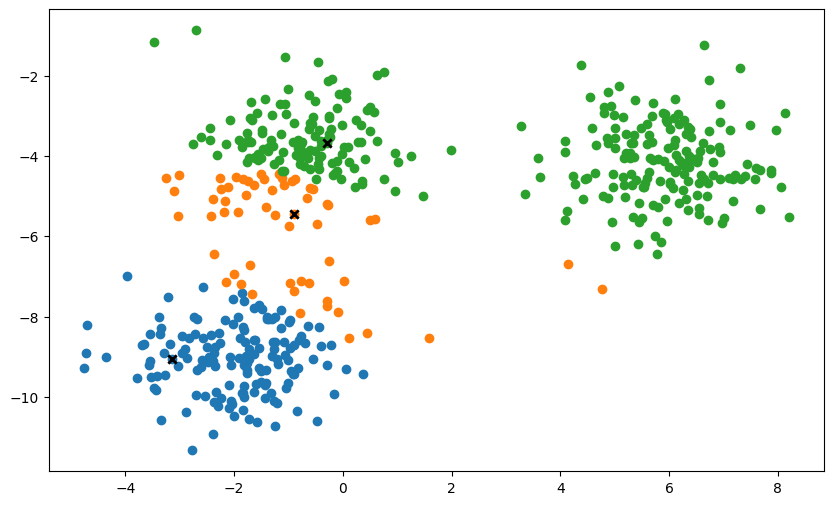

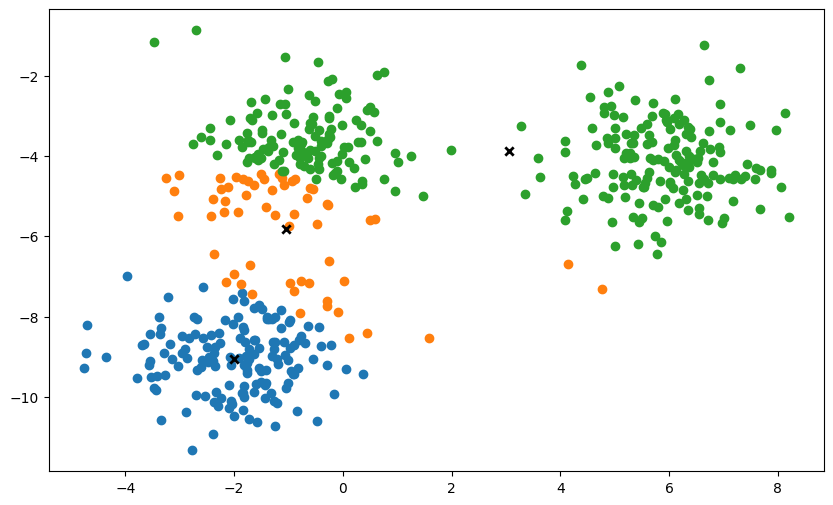

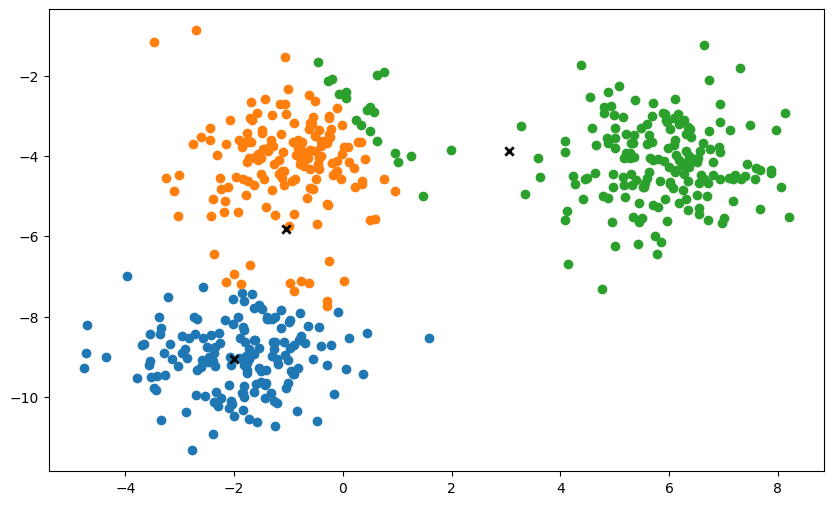

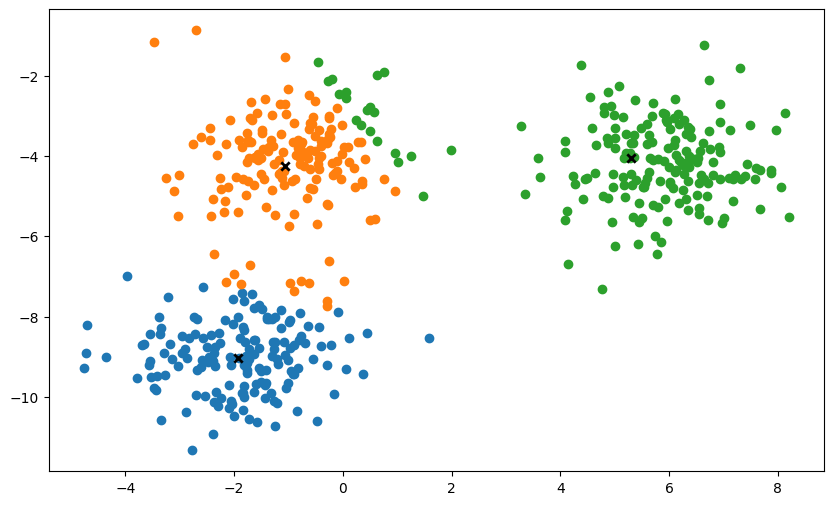

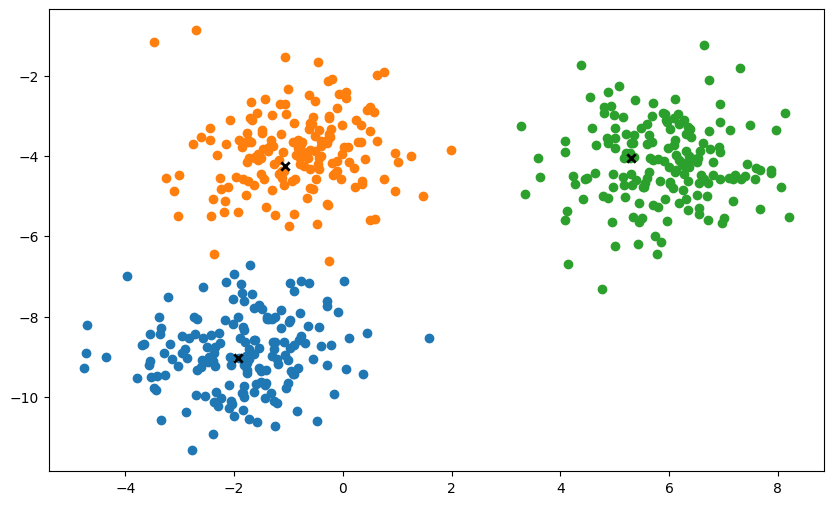

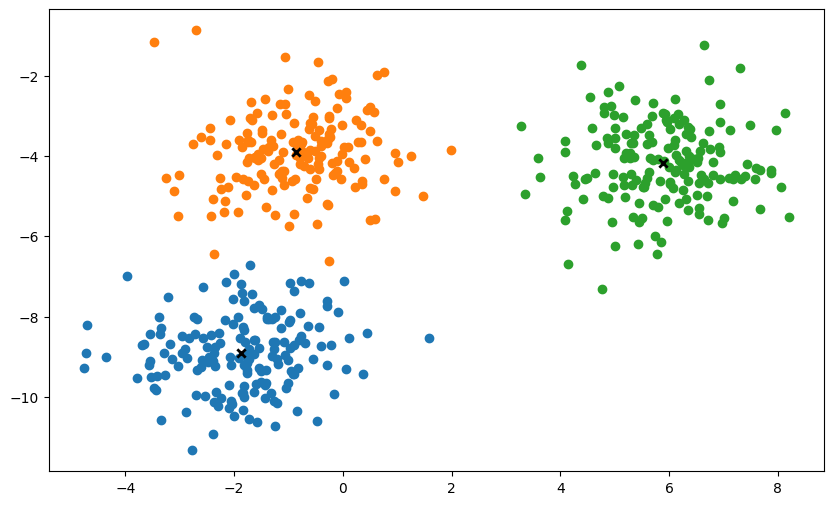

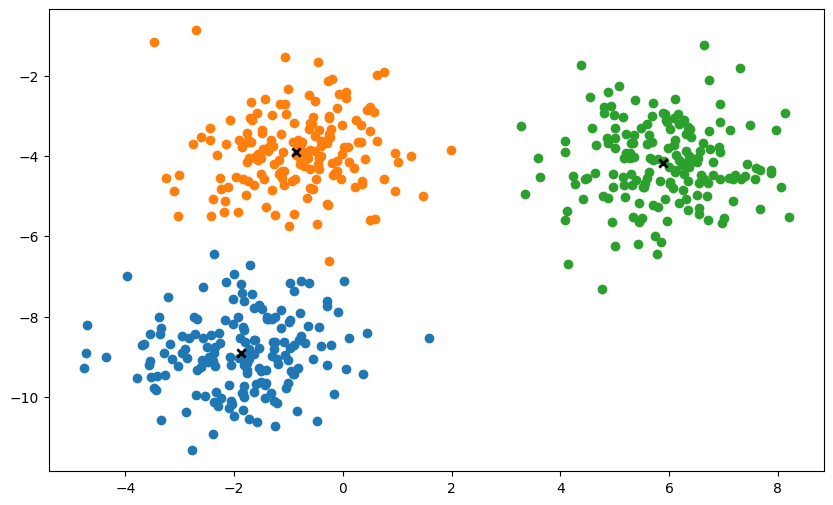

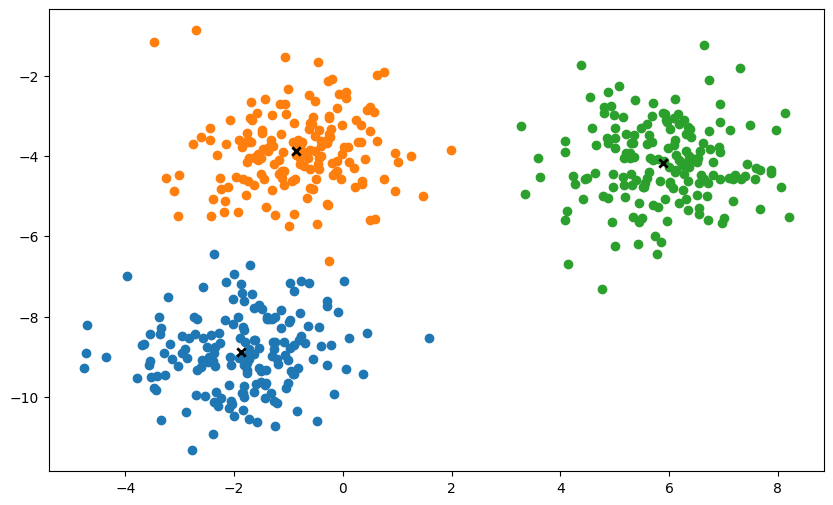

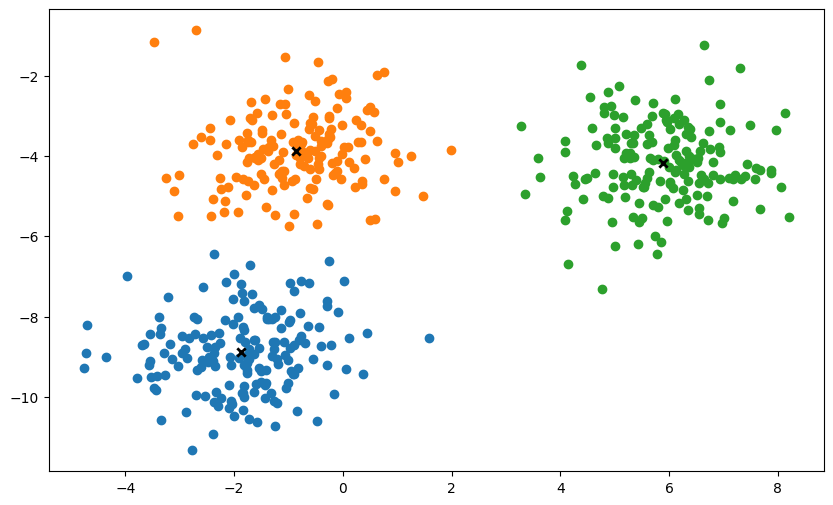

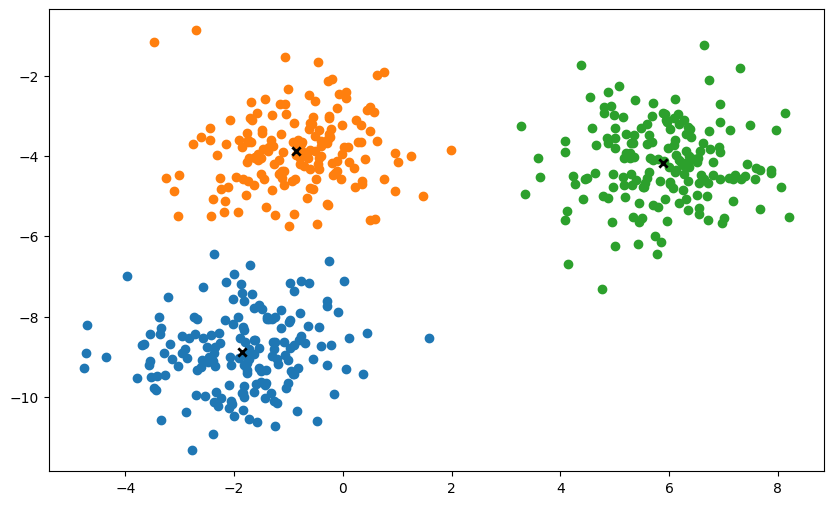

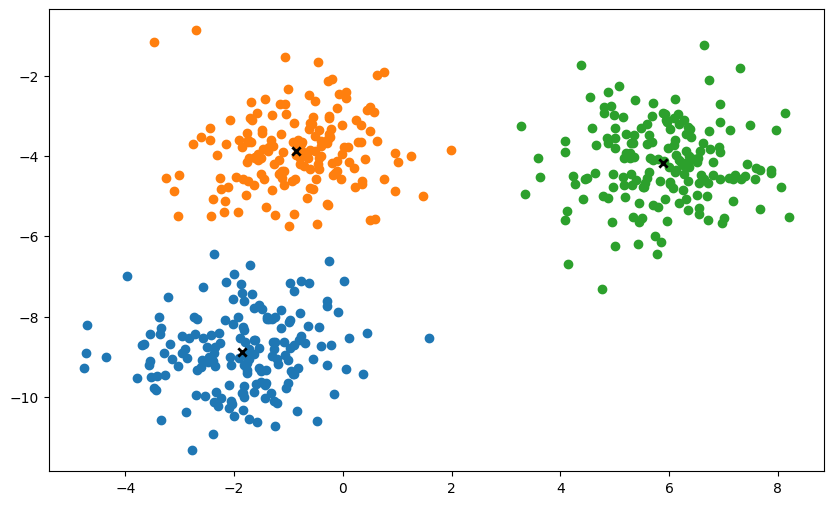

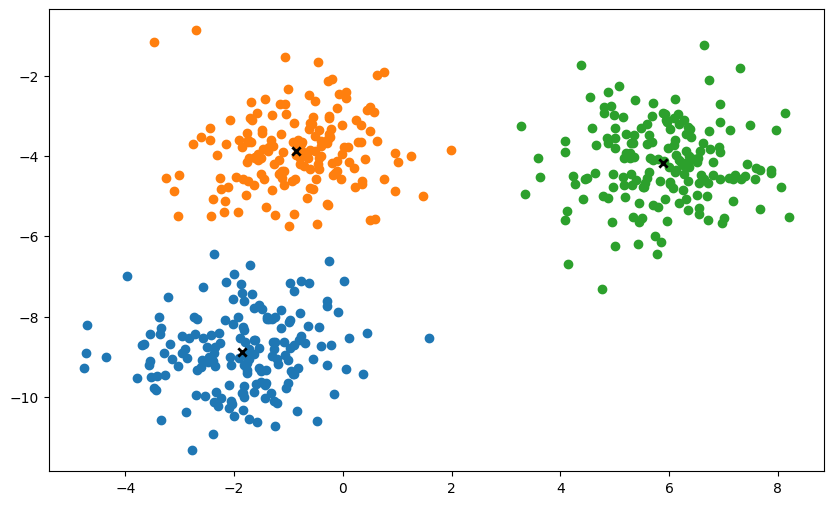

In [5]:
if __name__ == "__main__":
    np.random.seed(42)
    from sklearn.datasets import make_blobs

    X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )
    print(X.shape)

    clusters = len(np.unique(y))
    print(clusters)

    kmean = KMeans(k=clusters, n_iters=200, plot_flag=True)
    y_pred = kmean.predict(X)

    kmean.plot()